## 270 - Predicting the Path of the Chinese Balloon

[Youtube](https://www.youtube.com/watch?v=pWGBB_wM4v0)

![](balloon_sightings.png)

In [1]:
from datetime import datetime

In [2]:
billings_coords = (-108.5, 45.783)
pleasant_hill_coords = (-94.269, 38.788)
columbia_coords = (-92.334, 38.952)
asheville_coords = (-82.552, 35.595)
myrtle_beach_coords = (-78.887, 33.689)

path_coords = [billings_coords,
               pleasant_hill_coords,
               columbia_coords,
               asheville_coords,
               myrtle_beach_coords]

In [3]:
path_times = [datetime(2023, 2, 1, 23, 45),
              datetime(2023, 2, 3, 17, 0),
              datetime(2023, 2, 3, 19, 0),
              datetime(2023, 2, 4, 14, 0),
              datetime(2023, 2, 4, 19, 9)]

In [4]:
import pyproj

In [5]:
geodesic = pyproj.Geod(ellps='WGS84')

leg_lengths, leg_bearings, leg_times = [], [], []
for i in range(len(path_coords)-1):
    bearing, _, distance = geodesic.inv(path_coords[i][0], path_coords[i][1],
                                        path_coords[i+1][0], path_coords[i+1][1])
    leg_lengths.append(distance)
    leg_bearings.append(bearing)            
    leg_times.append(path_times[i+1] - path_times[i])

In [6]:
leg_lengths

[1404372.3386641853, 168909.13093112054, 943529.215000063, 396963.300345408]

In [7]:
leg_bearings

[118.54137658204613, 83.20577699246873, 110.21883256433819, 121.1279262451508]

In [8]:
leg_times

[datetime.timedelta(days=1, seconds=62100),
 datetime.timedelta(seconds=7200),
 datetime.timedelta(seconds=68400),
 datetime.timedelta(seconds=18540)]

In [9]:
leg_velocities = [length / time.total_seconds() for length, time in zip(leg_lengths, leg_times)]

In [10]:
leg_velocities

[9.457052785617408, 23.459601518211187, 13.794286769006769, 21.41118124840388]

In [11]:
# North Platte, Topeka, Nashville, Charleston
leg_sounding_stations = ['LBF', 'TOP', 'BNA', 'CHS']
leg_sounding_times = [datetime(2023, 2, 3, 0, 0),
                      datetime(2023, 2, 3, 12, 0),
                      datetime(2023, 2, 4, 0, 0),
                      datetime(2023, 2, 4, 12, 0)]

In [12]:
from metpy.units import units, pandas_dataframe_to_unit_arrays
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [13]:
sounding_speeds, sounding_directions = [], []
for station, time in zip(leg_sounding_stations, leg_sounding_times):
    df = WyomingUpperAir.request_data(time, station)
    df = pandas_dataframe_to_unit_arrays(df)
    idx = df['pressure'] == 70 * units.hPa
    sounding_speeds.append(df['speed'][idx].to('m/s'))
    sounding_directions.append(df['direction'][idx] - 180 * units('deg'))

In [14]:
leg_number = range(1, 5)

In [16]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Leg')

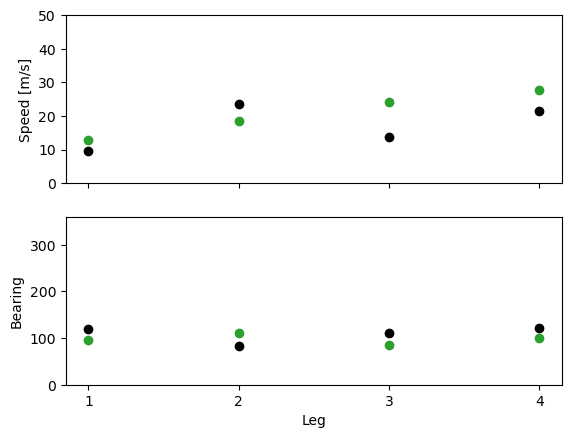

In [17]:
fig, axes = plt.subplots(nrows=2, sharex=True)

axes[0].scatter(leg_number, leg_velocities, label='Observed', color='k')
axes[0].scatter(leg_number, sounding_speeds, label='Calculated', color='tab:green')
axes[0].set_ylim(0, 50)

axes[1].scatter(leg_number, leg_bearings, label='Observed', color='k')
axes[1].scatter(leg_number, sounding_directions, label='Calculated', color='tab:green')
axes[1].set_ylim(0, 360)

axes[0].set_xticks(leg_number)

axes[0].set_ylabel('Speed [m/s]')
axes[1].set_ylabel('Bearing')
axes[1].set_xlabel('Leg')